# What are financial charts? 📈
Financial charts are charts that visually show different company and financial parameters such as liquidity, budgets, costs, cash flow, and so on over time. Financial charts are an excellent approach to convey information about company or financial markets.

# Why plotly? 📊
Why are we using plotly instead of the more common matplotlib or seaborn?
* Interactivity: Compared to other python libraries, plotly gives much more interactivity to the user
* Simplicity: Simple syntax when it comes to ploting complicated financial charts like OHLC plots
* Aestheics: Its just prettier🤪

This notebook aims to be like a cheatsheet when working with financial data - mainly stocks to make easier, aesthetic and more interactive charts and plots. 

In [18]:
pip install "jupyterlab>=3" "ipywidgets>=7.6"

You should consider upgrading via the 'C:\Users\조성원\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [19]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello Figure')
fig.show()

In [20]:
#just the usual
import os
import numpy as np
import pandas as pd

#All necessary plotly libraries
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

For our example, we're using a dataset of TSLA stock prices from the year 2010 to 2020. The dataset contains daily Date, Open, High, Low, Close and Volume features

In [21]:
df = pd.read_csv("C:\\00_stephanjo_software\\00 Kaggle\\stock_time series\\TSLA.csv")
#Date needs to be in datetime format to plot timeseries
df['Date'] = pd.to_datetime(df['Date'])
df.index = range(len(df))

In [22]:
df.head()

Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

# Let the Plotting begin
The true beauty of a plotly graph is in its interactivity, hover the cursor to top right corner to access the various features to interact with the graphs, you can also zoom in and zoom out of the plots and also crop certain parts to focus on a specific time period for example. 
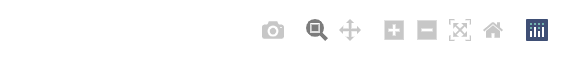

Hover over the line and plots to get the actual values at that given data too. 

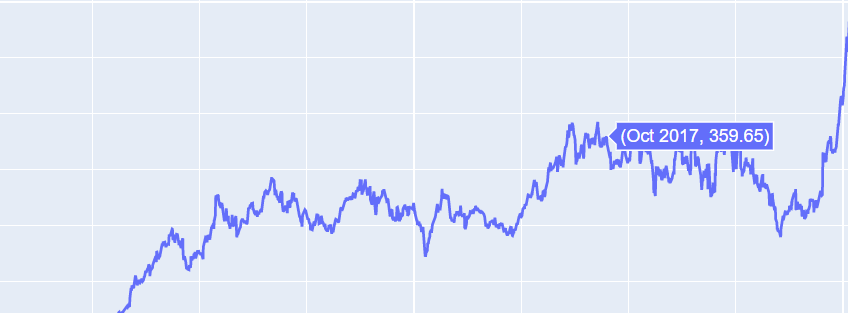

# Timeseries Plot
Starting with Timeseries, these plots are essentially linegraphs over a course of time and can be used to plot Open, High, Low and Close prices indiviually. Most Frequently the Closing Price or the Highs are plotted to see the trend in which the stock is moving./

In [23]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Close'])])
fig.show()

We can also add Sliders and Range Selectors to our plots.
Range selector buttons are special controls that work well with time series and range sliders, and allow users to easily set the range of the x-axis.

In [24]:
fig = px.line(df, x='Date', y='High', title='Range Slider and Selectors')

fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# Bar Charts
Although not very popular with stock data, plotly also has beautiful bar charts. So for the sake of this tutorial lets plot a few

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'],marker_color='indianred'))

# Candlestick Plots
Ask any person in the financial domain, the best way to represent a stock in terms of a plot would be a **Candlestick** plot. These are essentially little boxplots that represent the Open, High, Close and Low of a stock on a given time frame. A red candlestick is a **bearish** candle (Closing price < Opening price) and a green candle is a **bullish** candle (Closing price > Opening price)

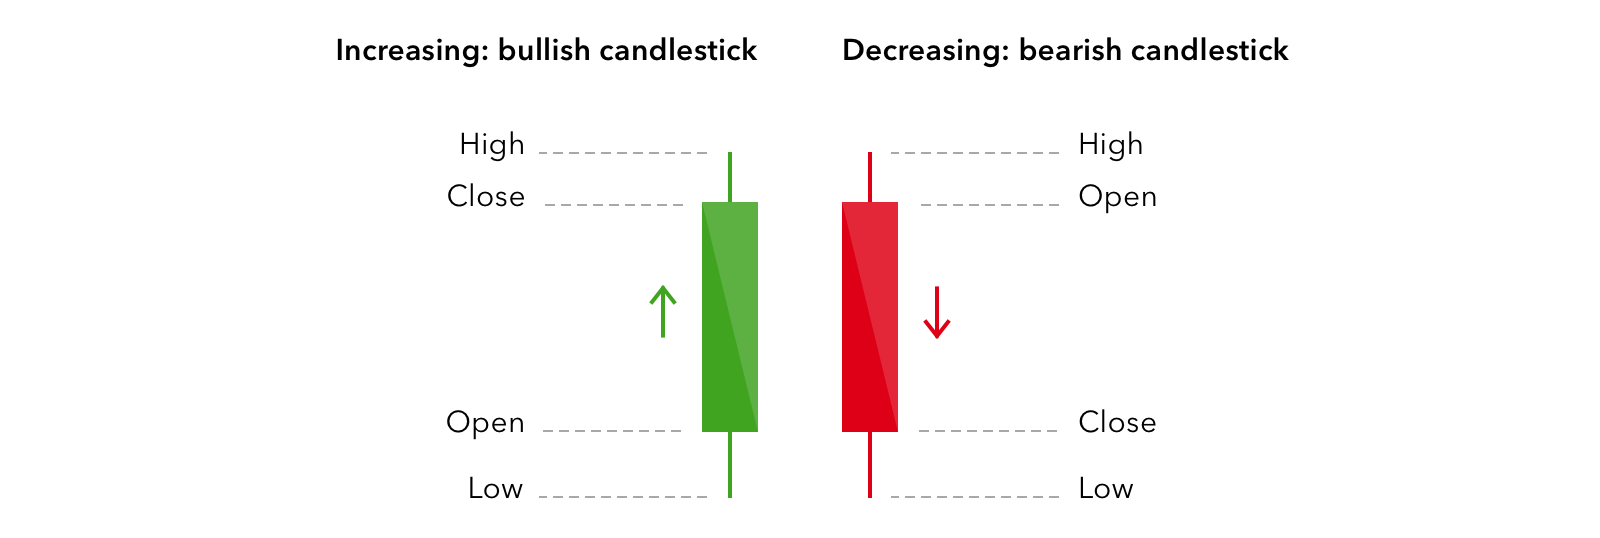

In [26]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

You can also customize the colours of the candlesticks as per your aesthetics and needs using the **increasing_line_color** and **decreasing_line_color** parameters

In [27]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], increasing_line_color= 'yellow', decreasing_line_color= 'black')])

fig.show()

# OHLC Plots

Similar to a candle stick, you can also plot OHLC plots that essentially deliver the same purpose of ploting the Open, High, Low and CLose of a stock but just in the different aesthetic. 
Also, like matplotlib even plotly has a make_subplots function that can be used to combine plots together, in our cases the OHLC plot with the Volume

In [28]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=df.Date, open=df.Open, high=df.High, low=df.Low, close=df.Close, name='Price'), row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

Usually when represeting stocks, there are certain periods that one wishes to show through their plots and how beyond that the trend of the stock changed, in our dataset I have used the annotation function to show the big boom in tesla stock that happened in October 2019.

In [29]:
fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='TSLA Stock',
    shapes = [dict(x0='2019-10-10', x1='2019-10-10', y0=0, y1=1, xref='x', yref='paper',line_width=3)],
    annotations=[dict(x='2019-10-10', y=0.05, xref='x', yref='paper', xanchor='left', text='The Boom in TSLA Stock')]
)

fig.show()

# Indicators
Indicators are best way to visualize a stock pattern. I usually use three of the most common ones to get a basic idea of the trend of the stock. Just for the sake of the tutorial, we'll plot these too using plotly. The indicators are:
* Simple Moving Average (SMA)
* Exponential Moving Average (EMA)
* Relative Strength Index (RSI) 

In [30]:
#EMA
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['EMA_22'] = df['Close'].ewm(22).mean().shift()
#SMA
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()
#RSI14
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = RSI(df).fillna(0)

EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())


(Also great way to demonstrate the add_trace function of plotly)

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_22, name='EMA 22'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.3))
fig.show()


In [32]:
fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

In [33]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

Hope this notebook helps you. I have tried to make it short and exclusive to financial data but plotly has a lot of other features and visualization that can be used on any sort of data. I do plan on updating this notebook so suggestions are welcomed

I have ditched matplotlib...when are you?

Plotly documentation: https://plotly.com/graphing-libraries/